In [62]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import joblib
import streamlit as st


In [63]:
df = pd.read_csv('insurance.csv')

In [64]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [65]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [66]:
le = LabelEncoder()
for col in ['sex', 'smoker']:
    df[col] = le.fit_transform(df[col])

In [67]:
oe = OneHotEncoder(sparse_output=False)
region_encoded = oe.fit_transform(df[['region']]);

In [68]:
model = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42)

In [69]:
X_other = df[['age', 'sex', 'bmi', 'children', 'smoker']]

In [70]:
region_feature_names = oe.get_feature_names_out(['region'])
other_feature_names = ['age', 'sex', 'bmi', 'children', 'smoker']
all_feature_names = np.concatenate([region_feature_names, other_feature_names])

In [71]:
X = pd.DataFrame(
    np.concatenate([region_encoded, X_other], axis=1),
    columns=all_feature_names
)

In [72]:
print(X.head())

   region_northeast  region_northwest  region_southeast  region_southwest  \
0               0.0               0.0               0.0               1.0   
1               0.0               0.0               1.0               0.0   
2               0.0               0.0               1.0               0.0   
3               0.0               1.0               0.0               0.0   
4               0.0               1.0               0.0               0.0   

    age  sex     bmi  children  smoker  
0  19.0  0.0  27.900       0.0     1.0  
1  18.0  1.0  33.770       1.0     0.0  
2  28.0  1.0  33.000       3.0     0.0  
3  33.0  1.0  22.705       0.0     0.0  
4  32.0  1.0  28.880       0.0     0.0  


In [73]:
y = df['charges']

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, shuffle=True, random_state=42)

In [88]:
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, n_estimators=200, random_state=42)

In [76]:
y_pred = model.predict(X_test)

In [77]:
comparison = pd.DataFrame({
    'Actual' : y_test.head(),
    'Prediction': y_pred[:5]
})

In [78]:
print(comparison)

           Actual    Prediction
764    9095.06825  10041.352958
887    5272.17580   5156.269389
890   29330.98315  28071.561655
1293   9301.89355  11714.614186
259   33750.29180  34683.282601


In [89]:
prediction = model.predict([[30, 1, 23.2, 2, 0, 0, 1, 0, 1]])
prediction

C:\Users\cvdev\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([14785.71961992])

In [80]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [94]:
print('mse: ', mse)
print('mae: ', mae)
print('r2: ', r2)

mse:  20919717.678405974
mae:  2521.48743115767
r2:  0.865250314914718


In [82]:
error_percent = np.mean(abs(y_test - y_pred) / y_test) * 100

In [95]:
print("Average error: ", error_percent)

Average error:  29.962384384726228


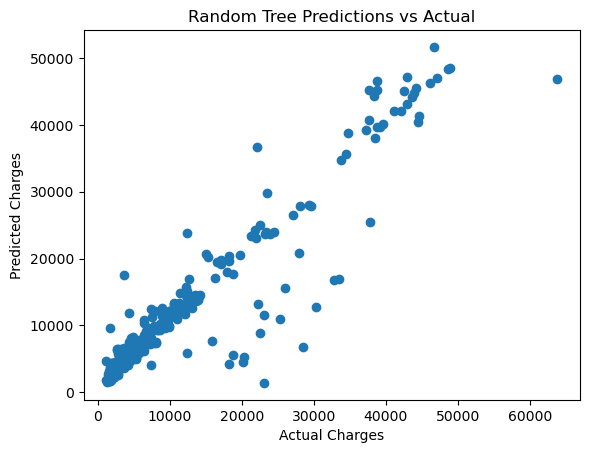

In [84]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Random Tree Predictions vs Actual')
plt.show()

In [85]:
joblib.dump(model, "insurance_model.pkl")

['insurance_model.pkl']

In [86]:
joblib.dump(oe, "region_encoder.pkl")

['region_encoder.pkl']

In [93]:
prediction = model.predict([[30, 1, 25.00, 0, 1, 1, 0, 0, 0]])
prediction

C:\Users\cvdev\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([1884.43410194])